In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
#it ignores harmless warnings

In [3]:
data=pd.read_csv("RestaurantVisitors.csv",index_col="date",parse_dates=True)
#load dataset

In [4]:
data.index.freq="D"

In [5]:
data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [7]:
data.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(517, 8)

 after getting information of dataset and taking a closer look at the null values we came to this conclusion that from index "478", the column named "total" has nothing but null values!its gonna help using SARIMAX considering endogenous feature!

In [9]:
data.iloc[478:]


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [10]:
df=data.dropna()
#getting rid of the null values for a while!


In [11]:
len(df)

478

In [12]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [13]:
columns=['rest1', 'rest2', 'rest3','rest4', 'total']

data.info told us the type of variables in last five columns are float which doesnt make any sense ,no need to explait that number of people should have been "int",we've converted the type of those features to integer!

In [14]:
for  column in columns:
    df[column]=df[column].astype(int)

In [15]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


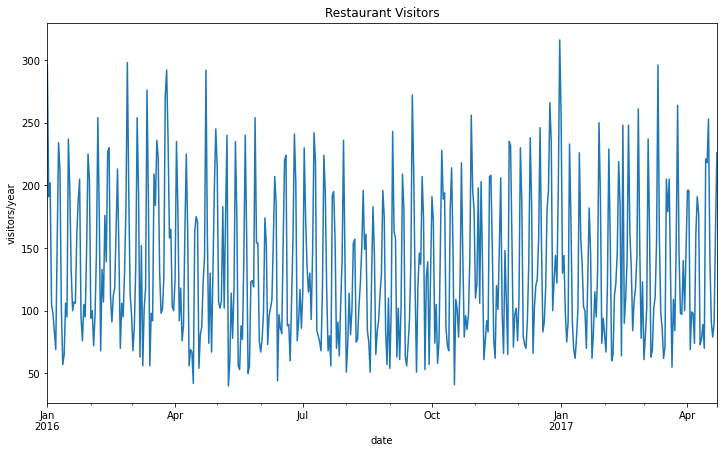

In [17]:
ax=df["total"].plot(figsize=(12,7))
ax.set(ylabel="visitors/year")
ax.set(title="Restaurant Visitors")
plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

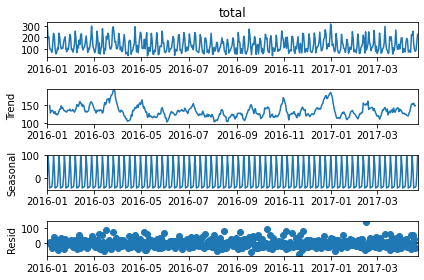

In [19]:
seasonal_decompose(df["total"]).plot();
#take a look at seasonality ,its considerable!

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(df["total"])
#here dicky-fuller test says :p-value= 1.319377094694154e-06,which rejects null hypothesis and data is stationary.

(-5.592496972543474,
 1.319377094694154e-06,
 18,
 459,
 {'1%': -3.4446773373329576,
  '5%': -2.8678574606780654,
  '10%': -2.5701349669405404},
 4596.809727672799)

In [22]:
from pmdarima import auto_arima

In [23]:
auto_arima(df["total"],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.44 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=4921.823, Time=1.90 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4796.636, Time=0.89 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.44 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4942.650, Time=1.77 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.78 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4778.269, Time=0.82 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [24]:
auto_arima(df["total"],seasonal=True,m=7).summary()
#let the auto-arima make a desicion for us!it pickes up the optimum p,d,q

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2385.134
Date:                   Fri, 16 Dec 2022   AIC                           4778.269
Time:                           11:11:52   BIC                           4794.947
Sample:                       01-01-2016   HQIC                          4784.826
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4568      1.817      3.002      0.003       1.895       9.019
ar.S.L7        0.9581      0.014     69.949      0.000       0.931       0.985
ma.S.L7       -0.7406      0.050    -14.693      0.000      -0.839      -0.642
sigma2      1234.2950     73.894     16.704      0.000    1089.466    1379.124
===================================================================================
Ljung-Box (L1) (Q):                  16.28   Jarque-Bera (JB):                60.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
df.shape

(478, 8)

In [27]:
train=df.iloc[:450]
test=df.iloc[450:]
#Set four weeks for testing

In [28]:
fitted_model=SARIMAX(train["total"],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False).fit()

In [29]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  450
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2234.277
Date:                   Fri, 16 Dec 2022   AIC                           4474.553
Time:                           11:12:01   BIC                           4486.881
Sample:                       01-01-2016   HQIC                          4479.412
                            - 03-25-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   6.63e-05   1.51e+04      0.000       1.000       1.000
ma.S.L7       -0.9515      0.022    -43.137      0.000      -0.995      -0.908
sigma2      1107.5978     59.105     18.740      0.000     991.755    1223.441
===================================================================================
Ljung-Box (L1) (Q):                  12.46   Jarque-Bera (JB):                80.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.71
Prob(H) (two-sided):                  0.98   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
prediction=fitted_model.predict(len(train),len(test)+len(train)-1).rename("prediction")

<function matplotlib.pyplot.show(close=None, block=None)>

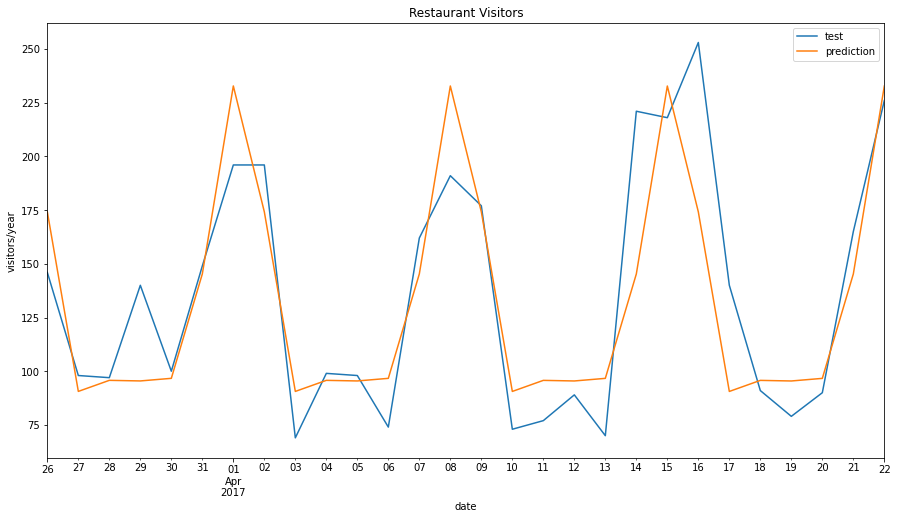

In [31]:
ax=test["total"].plot(figsize=(15,8),legend=True,label="test")
prediction.plot(legend=True)
ax.set(ylabel="visitors/year")
ax.set(title="Restaurant Visitors")
plt.show

In [32]:
from statsmodels.tools.eval_measures import rmse
#evaluating the model1

In [33]:
rmse(test["total"],prediction)

29.587623516967632

the same dataset with considering an exogenous variable

In [34]:
df[["holiday"]]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [35]:
auto_arima(df["total"],X=df[["holiday"]],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4798.141, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.31 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4714.965, Time=0.99 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=0.67 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4814.577, Time=1.58 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=1.23 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4829.767, Time=0.89 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5091.187, T

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [36]:
auto_arima(df["total"],X=df[["holiday"]],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2351.483
Date:                             Fri, 16 Dec 2022   AIC                           4714.965
Time:                                     11:13:12   BIC                           4739.983
Sample:                                 01-01-2016   HQIC                          4724.801
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.5139      2.924      5.305      0.000       9.783      21.245
holiday       44.7512      4.539      9.860      0.000      35.856      53.647
ar.L1          0.1478      0.048      3.075      0.002       0.054       0.242
ar.S.L7        0.8611      0.024     35.932      0.000       0.814       0.908
ma.S.L7       -0.4017      0.061     -6.629      0.000      -0.520      -0.283
sigma2      1111.3257     80.364     13.829      0.000     953.815    1268.836
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 7.90
Prob(Q):                              0.27   Prob(JB):                         0.02
Heteroskedasticity (H):               0.90   Skew:                             0.30
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
len(df[["holiday"]])

478

In [38]:
#need to know:sarimax tabke exog as as datafrem not a seri!

In [39]:
fitted_model=SARIMAX(train["total"],exog=train[["holiday"]],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False).fit()

In [40]:
predictionexo=fitted_model.predict(len(train),len(train)+len(test)-1,exog=test[["holiday"]]).rename("prediction with exo")

<function matplotlib.pyplot.show(close=None, block=None)>

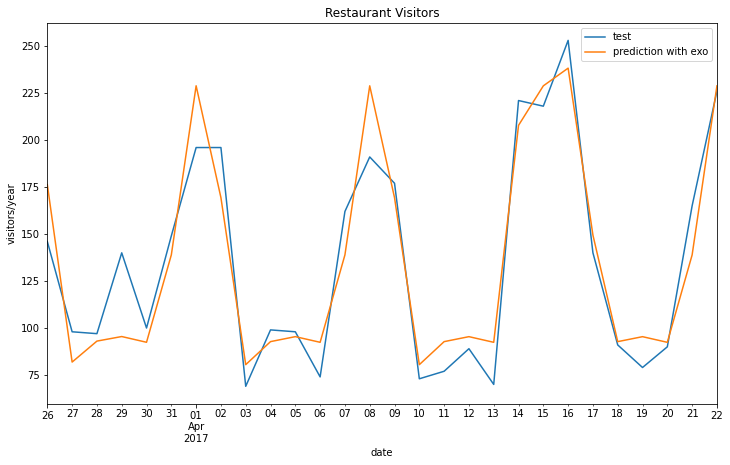

In [41]:
ax=test["total"].plot(figsize=(12,7),legend=True,label="test")
predictionexo.plot(legend=True)
ax.set(ylabel="visitors/year")
ax.set(title="Restaurant Visitors")
plt.show

In [42]:
rmse(test["total"],predictionexo)

18.97185155001302

In [43]:
#29.587623516967632......this rmse with out exog
#18.97185155001302........this rms with exgo

lets have fun with unknown future!

In [44]:
fitted_whole=SARIMAX(df["total"],exog=df[["holiday"]],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False).fit()

In [45]:
forcast_unkown=fitted_whole.predict(len(df),len(df)+38,exog=data[["holiday"]].iloc[478:]).rename("forcast")

<AxesSubplot:xlabel='date'>

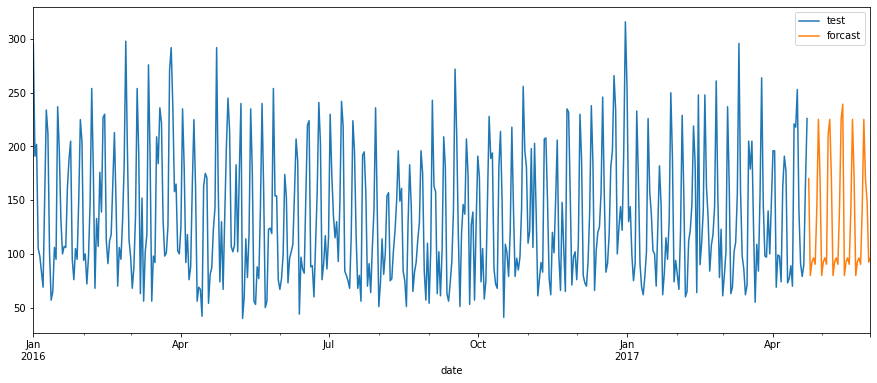

In [46]:
df["total"].plot(figsize=(15,6),legend=True,label="test")
forcast_unkown.plot(legend=True)

<function matplotlib.pyplot.show(close=None, block=None)>

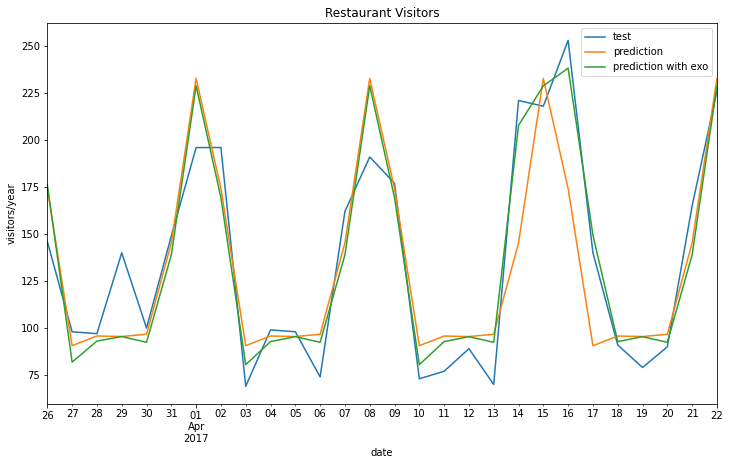

In [47]:
ax=test["total"].plot(figsize=(12,7),legend=True,label="test")
prediction.plot(legend=True)
predictionexo.plot(legend=True)
ax.set(ylabel="visitors/year")
ax.set(title="Restaurant Visitors")
plt.show